# Lab 4: Image Segmentation and Object Counting
## Lab Objective
The purpose of this lab is to reinforce key concepts from the Week 5 lectures by developing a specific algorithm for image segmentation and analysis. The focus will be on using intensity thresholding and binary morphological operators to segment images and count objects. This task is crucial for quantitative image analysis in computer vision applications.

The `show_image` function allows for visual inspection of the images being processed, ensuring they are correctly read and displayed. The `count_objects` function uses OpenCV's connected components analysis to count the number of segmented objects, excluding the background.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Display Images
def show_image(img, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Count Objects
def count_objects(img):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)
    return num_labels - 1  # Subtracting 1 to exclude the background label

Each of the above functions (`process_fruits`, `process_leaves`, `process_pears`) starts by reading the image and converting it to HSV color space. A mask is created based on color ranges suitable for fruits, leaves, or pears respectively. Binary morphology operations are performed to refine the mask, filtering out noise and filling holes. Contours are identified and filtered according to their area, with valid contours being drawn onto a blank image to form the final result.

In [6]:
def process_fruits(image_path):
    img = cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Create mask for main fruit colors
    lower_color = np.array([0, 100, 100])
    upper_color = np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Morphological operations
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Find and filter contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = np.zeros_like(mask)
    for contour in contours:
        area = cv2.contourArea(contour)
        if 20000 < area < 100000:
            cv2.drawContours(result, [contour], 0, 255, -1)
    
    return result

def process_leaves(image_path):
    img = cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Create mask for light blue leaves
    lower_color = np.array([95, 100, 100])
    upper_color = np.array([105, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Morphological operations
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Find and filter contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = np.zeros_like(mask)
    for contour in contours:
        area = cv2.contourArea(contour)
        if 500 < area < 5000:
            cv2.drawContours(result, [contour], 0, 255, -1)
    
    return result

def process_pears(image_path):
    img = cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Create mask for pears and leaves
    lower_color = np.array([20, 50, 50])
    upper_color = np.array([70, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Morphological operations
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Find and filter contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = np.zeros_like(mask)
    for contour in contours:
        area = cv2.contourArea(contour)
        if 5000 < area < 50000:
            cv2.drawContours(result, [contour], 0, 255, -1)
    
    return result

This part of the code iterates over the list of image paths, selects the appropriate processing function based on the image name, and applies it to generate a segmented result. The number of objects is counted and printed alongside the segmented image. This ensures the algorithm is tested against all provided images and the results are presented in a consistent manner.

Processing ./original_images/Fruits.png


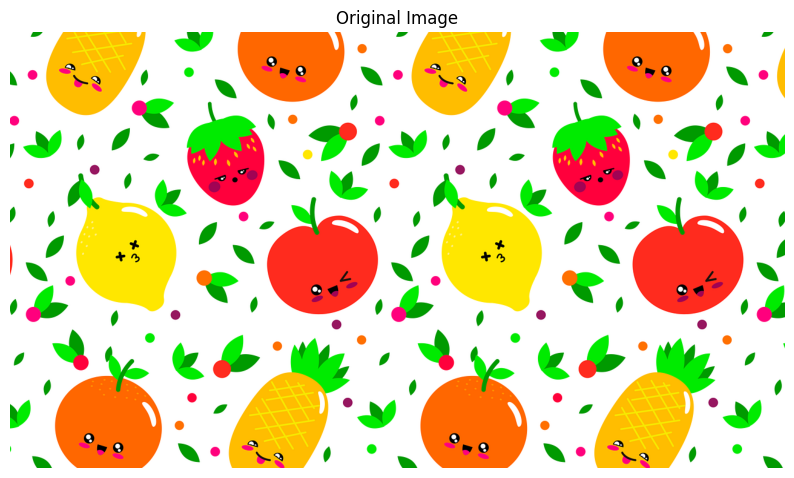

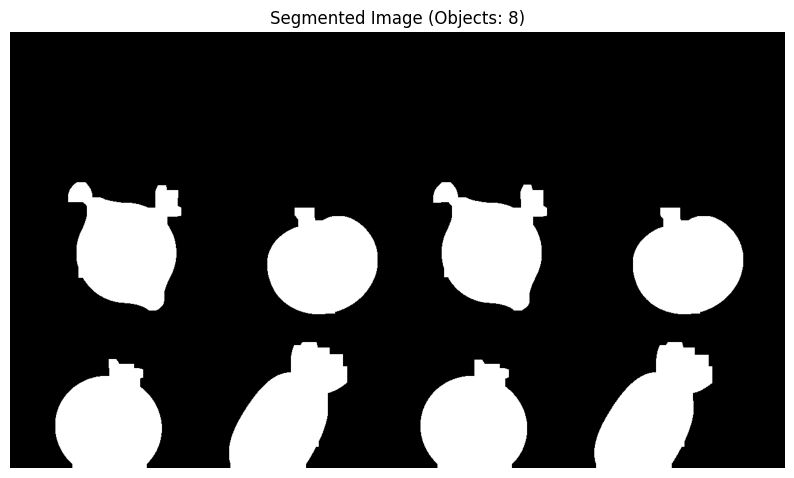

Number of objects detected: 8

Processing ./original_images/Leaves.png


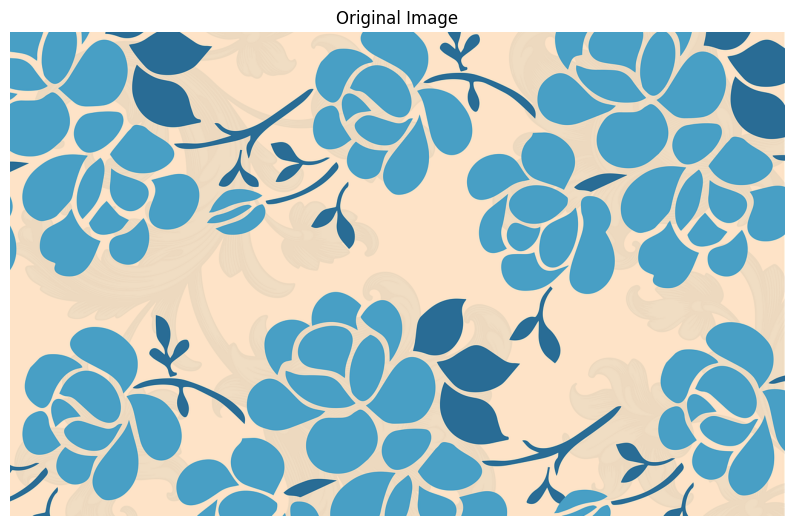

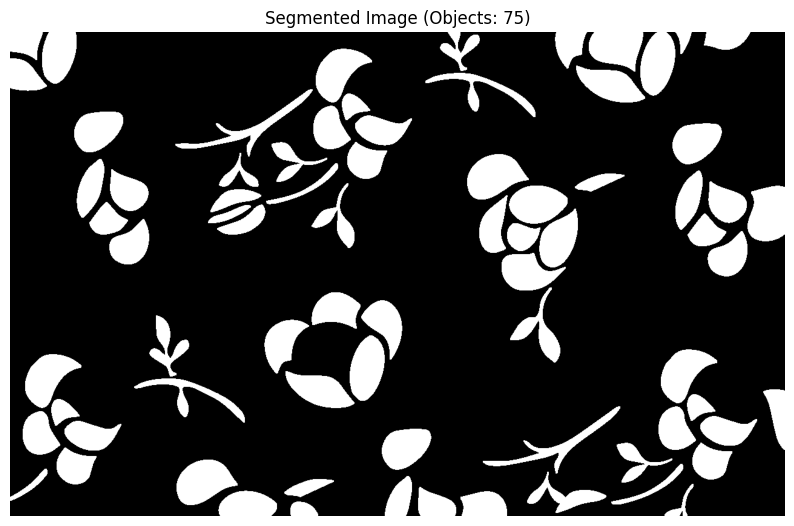

Number of objects detected: 75

Processing ./original_images/Pears.png


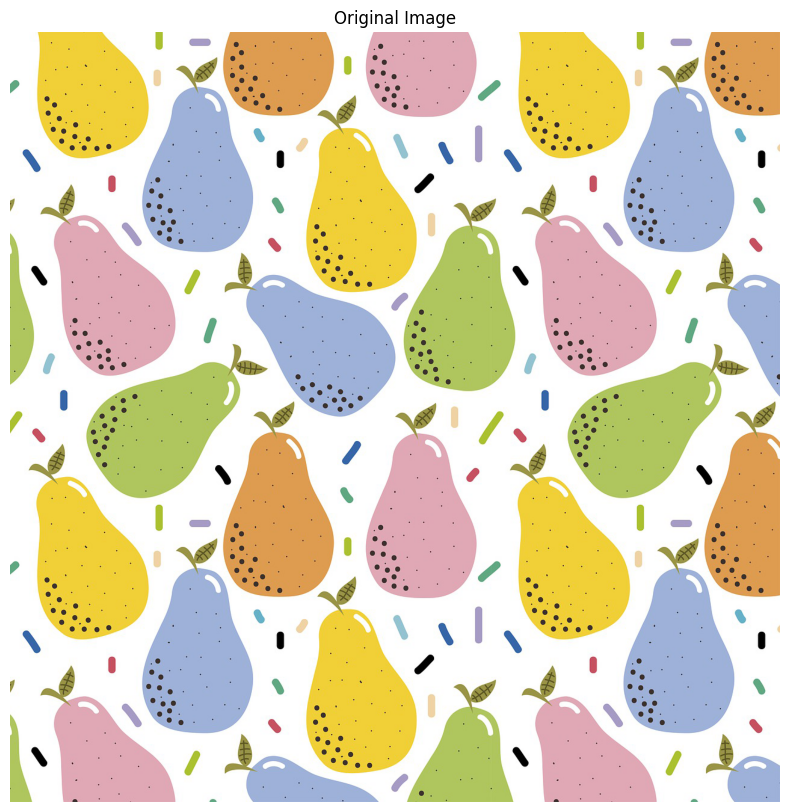

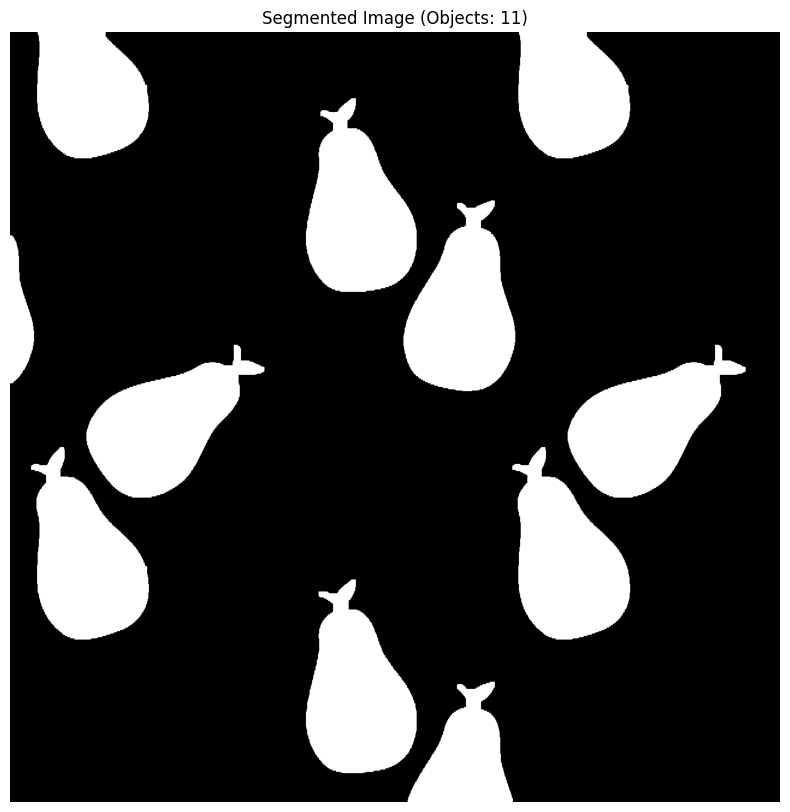

Number of objects detected: 11



In [7]:
# Processing Images
image_paths = ['./original_images/Fruits.png', './original_images/Leaves.png', './original_images/Pears.png']

for path in image_paths:
    print(f"Processing {path}")
    if 'Fruits.png' in path:
        result = process_fruits(path)
    elif 'Leaves.png' in path:
        result = process_leaves(path)
    elif 'Pears.png' in path:
        result = process_pears(path)

    num_objects = count_objects(result)
    show_image(cv2.imread(path), 'Original Image')
    show_image(result, f'Segmented Image (Objects: {num_objects})')
    print(f"Number of objects detected: {num_objects}\n")